Please upload your Excel file containing the time series data


Saving ARIMA.xlsx to ARIMA (1).xlsx
First few rows of the dataset:
     YEAR     GDP     PDI     PCE  PROFITS  DIVIDENDS  Unnamed: 6  Unnamed: 7  \
0  1970.1  2872.8  1990.6  1800.5     44.7       24.5         NaN         NaN   
1  1970.2  2860.3  2020.1  1807.5     44.4       23.9         NaN         NaN   
2  1970.3  2896.6  2045.3  1824.7     44.9       23.3         NaN         NaN   
3  1970.4  2873.7  2045.2  1821.2     42.1       23.1         NaN         NaN   
4  1971.1  2942.9  2073.9  1849.9     48.8       23.8         NaN         NaN   

                                          Unnamed: 8  
0                                                NaN  
1                                                NaN  
2                                         Table 21.1  
3  Macroeconomic Data, United States, 1970.1 to 1...  
4                                                NaN  


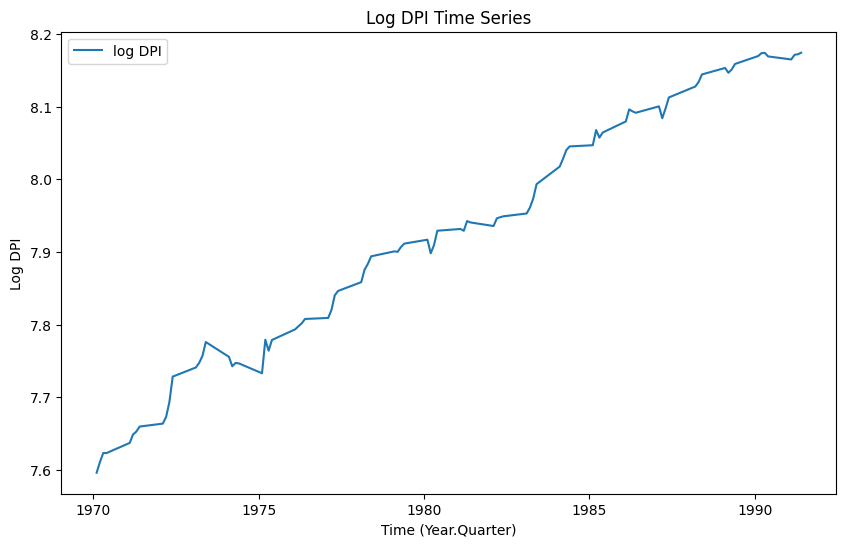


ADF Test on log DPI:
ADF Statistic: -1.4407471034265025
p-value: 0.5625931773883976
Critical Values: {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}
The series is not stationary (fail to reject the null hypothesis)

ADF Test on first-differenced log DPI:
ADF Statistic: -4.66915965544451
p-value: 9.612498486181354e-05
Critical Values: {'1%': -3.512738056978279, '5%': -2.8974898650628984, '10%': -2.585948732897085}
The series is stationary (reject the null hypothesis of a unit root)


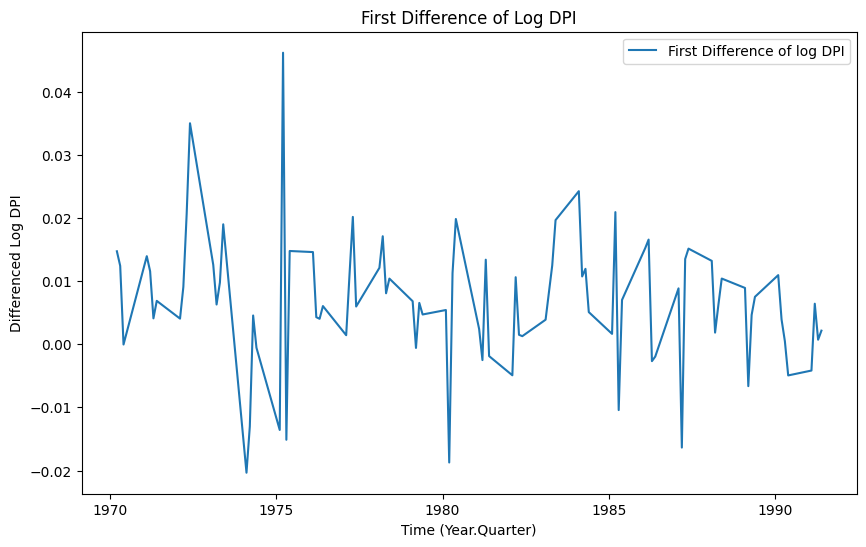

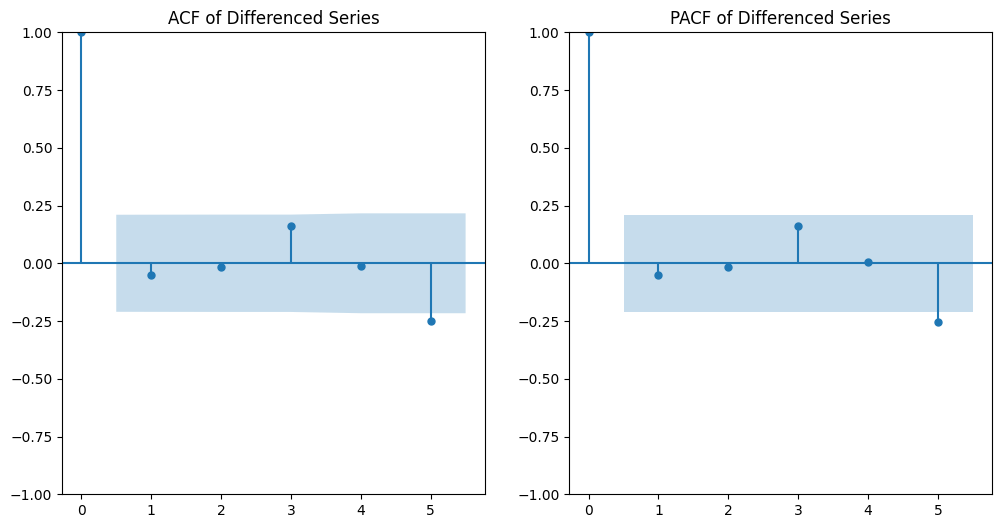


Fitting ARIMA(1,1,1) model:
                               SARIMAX Results                                
Dep. Variable:                log_DPI   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 270.603
Date:                Fri, 14 Mar 2025   AIC                           -535.206
Time:                        18:02:24   BIC                           -527.808
Sample:                             0   HQIC                          -532.227
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.004    239.383      0.000       0.992       1.008
ma.L1         -0.9886      0.146     -6.768      0.000      -1.275      -0.702
sigma2         0.0001  

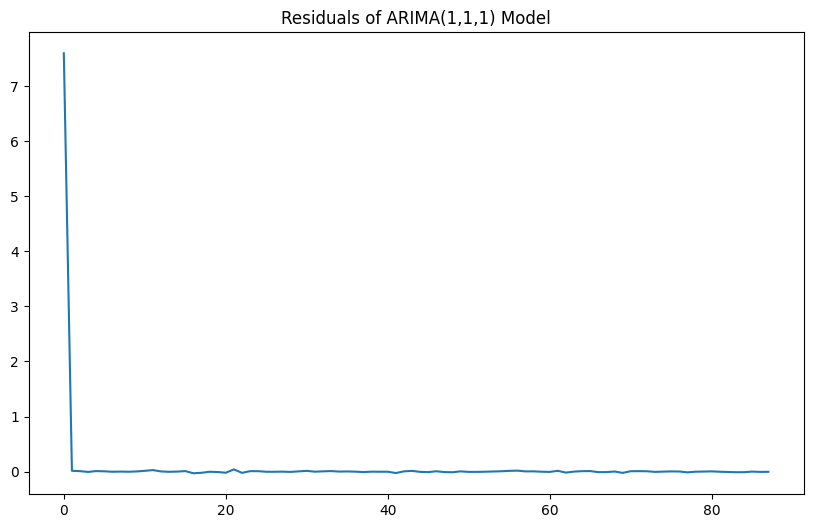

<Figure size 1000x600 with 0 Axes>

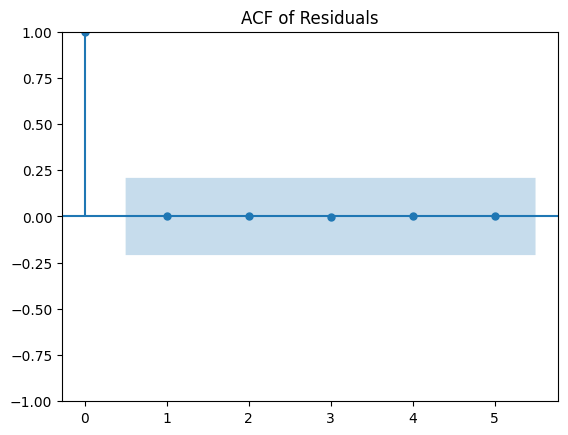


Forecast for the next 4 quarters:
88    8.180231
89    8.186463
90    8.192694
91    8.198924
Name: predicted_mean, dtype: float64


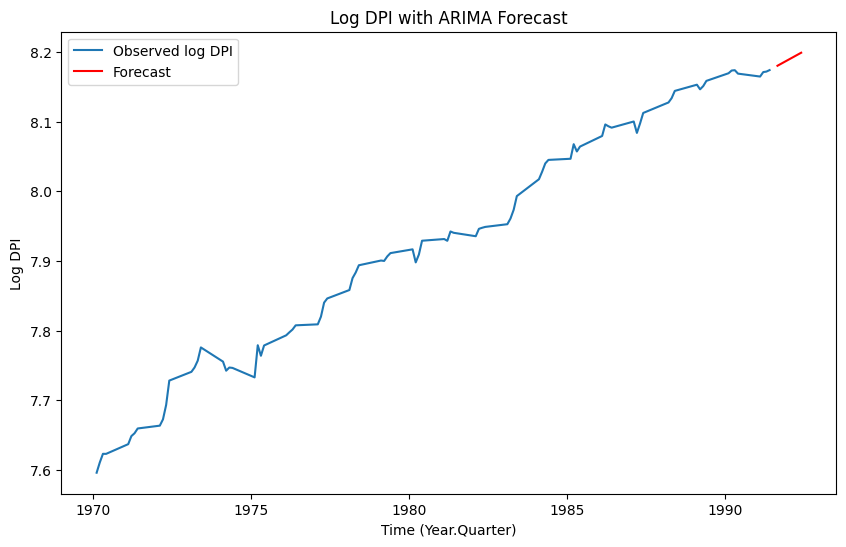

In [4]:
# Step 1: Install necessary libraries (if not already available in Colab)
!pip install statsmodels

# Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# Step 3: Upload the Excel file
print("Please upload your Excel file containing the time series data")
uploaded = files.upload()

# Step 4: Read the Excel file
# Replace 'your_file.xlsx' with the name of your uploaded file
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_excel(file_name)

# Display the first few rows to verify the data
print("First few rows of the dataset:")
print(df.head())

# Step 5: Prepare the data
# Use 'PDI' (Column C) as the proxy for DPI and take its logarithm
df['log_DPI'] = np.log(df['PDI'])

# Ensure the data is ordered by time
df = df.sort_values('YEAR')

# Extract the time series for analysis
ts = df['log_DPI']

# Step 6: Visualize the data (to check for trends, seasonality, etc.)
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], ts, label='log DPI')
plt.title('Log DPI Time Series')
plt.xlabel('Time (Year.Quarter)')
plt.ylabel('Log DPI')
plt.legend()
plt.show()

# Step 7: Check for stationarity using the Augmented Dickey-Fuller (ADF) test
# (As described in Gujarati, Section 21.9, page 754)
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("The series is stationary (reject the null hypothesis of a unit root)")
    else:
        print("The series is not stationary (fail to reject the null hypothesis)")

print("\nADF Test on log DPI:")
adf_test(ts)

# Step 8: Difference the series if not stationary (to determine 'd')
# First difference
ts_diff = ts.diff().dropna()
print("\nADF Test on first-differenced log DPI:")
adf_test(ts_diff)

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'][1:], ts_diff, label='First Difference of log DPI')
plt.title('First Difference of Log DPI')
plt.xlabel('Time (Year.Quarter)')
plt.ylabel('Differenced Log DPI')
plt.legend()
plt.show()

# Step 9: Identify p and q using ACF and PACF plots
# (As described in Gujarati, Section 22.4, page 778)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(ts_diff, ax=plt.gca(), lags=5)  # Reduced lags due to small dataset
plt.title('ACF of Differenced Series')
plt.subplot(122)
plot_pacf(ts_diff, ax=plt.gca(), lags=5)
plt.title('PACF of Differenced Series')
plt.show()

# Step 10: Fit the ARIMA model
# Based on the ACF and PACF, let's try ARIMA(1,1,1) as an initial guess
# (p=1, d=1, q=1) - you may need to adjust based on the plots
print("\nFitting ARIMA(1,1,1) model:")
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Step 11: Diagnostic checking
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA(1,1,1) Model')
plt.show()

# ACF of residuals (to check for autocorrelation)
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=5)
plt.title('ACF of Residuals')
plt.show()

# Step 12: Forecast using the ARIMA model
# Forecast the next 4 periods (1 year, since data is quarterly)
forecast = model_fit.forecast(steps=4)
print("\nForecast for the next 4 quarters:")
print(forecast)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], ts, label='Observed log DPI')
# Adjusted to match the 4 forecast steps with quarterly increments
forecast_years = np.arange(df['YEAR'].iloc[-1] + 0.25, df['YEAR'].iloc[-1] + 1.25, 0.25)
plt.plot(forecast_years, forecast, label='Forecast', color='red')
plt.title('Log DPI with ARIMA Forecast')
plt.xlabel('Time (Year.Quarter)')
plt.ylabel('Log DPI')
plt.legend()
plt.show()

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving bloomberg_3m.ipynb to bloomberg_3m.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>